# Histograms

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, **values are grouped into continuous bins**, and one bar for each bin is plotted depicting the number.

Important difference between barchart and histograms:
* Bar chart - displays frequencies for each vlaue (Qualitative data)
* Hist - displays frequencies for a "range" of values (Quantitative data)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# To render plots directly on the notebook
%matplotlib inline

In [2]:
pokemon = pd.read_csv("pokemon.csv")
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

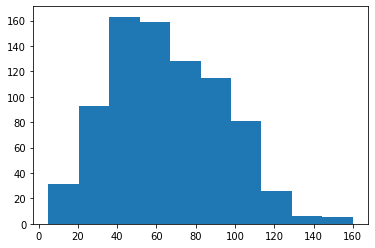

In [4]:
plt.hist(data=pokemon, x="speed")

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

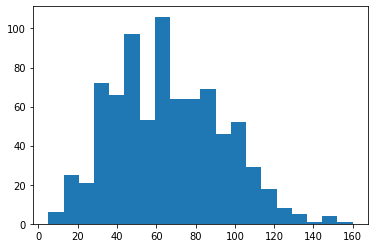

In [7]:
# Specify number of bins 
plt.hist(data=pokemon, x="speed", bins = 20)

As you can see, the bins used by histogram above has a lot of non-interger values. Since "speed" has integer values , we dont need this precision. Most often we specify the bins to our needs

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

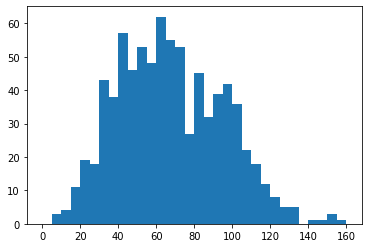

In [28]:
# specify bbins using arange() from numpy
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x="speed", bins = bins)

# Seaborn - histogram

* distplot()
* default bin size is larger than matplotlib

Note: Y-axis has smaller values compared to matplotlib because this plots the Kernel Density Estimation values and total area under the curve is 1. if we set kde=false, it plots the absolute values

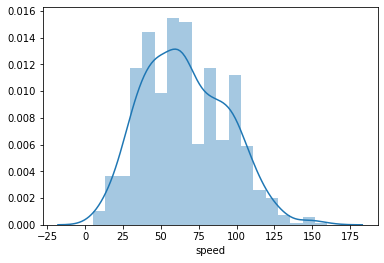

In [33]:
sb.distplot(pokemon['speed'])

### Kernel Density Estimation

**Kernel density estimation is one way of estimating the probability density function of a variable. **

In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

Interpreting proportions from this plot type is slightly trickier than a standard histogram: the vertical axis indicates a density of data rather than straightforward proportions. Under a KDE plot, the total area between the 0-line and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values. Making area judgments like this without computer assistance is difficult and likely to be inaccurate.

Despite the fact that making specific probability judgments are not as intuitive with KDE plots as histograms, there are still reasons to use kernel density estimation. If there are relatively few data points available, KDE provides a smooth estimate of the overall distribution of data. These ideas may not be so easily conveyed through histograms, in which the large discreteness of jumps may end up misleading.

It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data.

Seaborn's distplot function calls another function, kdeplot, to generate the KDE. The demonstration code below also uses a third function called by distplot for illustration, rugplot. In a rugplot, data points are depicted as dashes on a number line.



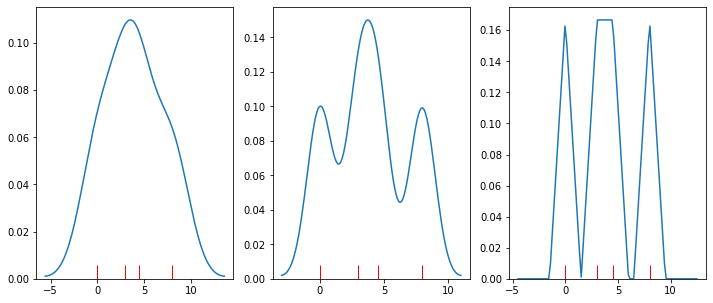

In [4]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})

###  Examples: Histogram plot of a normal distribution

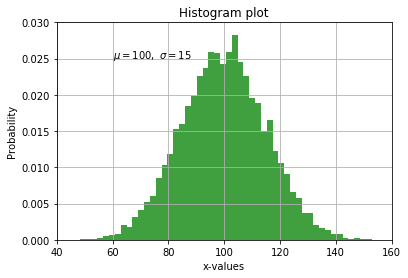

In [15]:

# Set seed for reproducibility of results
np.random.seed(100000)

mu, sigma = 100, 15
random_values = np.random.randn(10000)
# (x - mu)/sigma = randn
x = (random_values * sigma) + mu

# Compute histogram
n, bins, patches = plt.hist(x, 50, alpha=0.75, density=True, facecolor='g')

plt.xlabel('x-values')
plt.ylabel('Probability')
plt.title('Histogram plot')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [20]:
n[:10]

array([4.77904387e-05, 9.55808774e-05, 9.55808774e-05, 1.91161755e-04,
       5.73485264e-04, 6.69066142e-04, 8.60227896e-04, 2.00719843e-03,
       1.81603667e-03, 3.10637852e-03])

In [21]:
bins[:10]

array([48.31972352, 50.41219228, 52.50466104, 54.5971298 , 56.68959856,
       58.78206732, 60.87453608, 62.96700484, 65.0594736 , 67.15194236])